In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
# Load User_Stats.csv
user_stats_df = pd.read_csv('Users.csv')
print(user_stats_df.head())

   userId  average_reading_time  variance_reading_time  average_user_rating
0       1             10.315565             237.433203             4.366379
1       2              6.703333              11.494817             3.948276
2       3              7.376528              13.291537             2.435897
3       4              8.767488              36.617566             3.555556
4       5             11.623488             117.346621             3.636364


In [4]:
# Load Item.csv
item_df = pd.read_csv('Items.csv')
print(item_df.head())

   articleID  article_average_rating  article_year  \
0          1                3.920930          2016   
1          2                3.431818          2013   
2          3                3.259615          2017   
3          4                2.357143          2018   
4          5                3.071429          2018   

                                       article_title  Average Reading Time  
0  "Human-Animal Chimeras Are Gestating on U.S. R...                10.995  
1     "Too Much Information | MIT Technology Review"                 2.995  
2  "Hacking the Biological Clock | MIT Technology...                 7.595  
3  "Six things to do with your data before you di...                 8.305  
4   "Your genome, on demand | MIT Technology Review"                 2.300  


In [5]:
# Load Ratings.csv
ratings_df = pd.read_csv('Ratings.csv', encoding='ascii')
print(ratings_df.head())

   userId  articleID  rating
0       1          1     4.0
1       5          1     4.0
2       7          1     4.5
3      15          1     2.5
4      17          1     4.5


In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# from tqdm.notebook import tqdm

# Load the datasets
user_stats_df = pd.read_csv('Users.csv')
item_df = pd.read_csv('Items.csv')
ratings_df = pd.read_csv('Ratings.csv')

# Normalize the User and Item feature data
scaler = MinMaxScaler()

# Selecting numeric columns for normalization
user_features = user_stats_df[['average_reading_time', 'variance_reading_time', 'average_user_rating']]
item_features = item_df[['article_average_rating', 'article_year', 'Average Reading Time']]

# Normalizing the features
user_features_normalized = scaler.fit_transform(user_features)
item_features_normalized = scaler.fit_transform(item_features)

# Convert normalized features back to dataframe
user_features_normalized_df = pd.DataFrame(user_features_normalized, columns=user_features.columns)
item_features_normalized_df = pd.DataFrame(item_features_normalized, columns=item_features.columns)

# Display the head of the normalized dataframes
print(user_features_normalized_df.head())
print(item_features_normalized_df.head())

   average_reading_time  variance_reading_time  average_user_rating
0              0.391198               0.132161             0.829900
1              0.153401               0.004380             0.717658
2              0.197718               0.005396             0.311650
3              0.289286               0.018588             0.612230
4              0.477301               0.064245             0.633923
   article_average_rating  article_year  Average Reading Time
0                0.760207      0.695652              0.048970
1                0.651515      0.565217              0.010411
2                0.613248      0.739130              0.032582
3                0.412698      0.782609              0.036004
4                0.571429      0.782609              0.007061


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam

# Define the architecture of the User neural network
user_input = Input(shape=(3,), name='User-Input')
user_embedding = Dense(128, activation='relu')(user_input)
user_embedding = Dense(32, activation='relu')(user_embedding)
user_vector = Dense(8, activation='relu', name='User-Vector')(user_embedding)

# Define the architecture of the Item neural network
item_input = Input(shape=(3,), name='Item-Input')
item_embedding = Dense(128, activation='relu')(item_input)
item_embedding = Dense(32, activation='relu')(item_embedding)
item_vector = Dense(8, activation='relu', name='Item-Vector')(item_embedding)

# Compute the dot product of the two vectors
merged_vector = Dot(name='Dot-Product', axes=1)([user_vector, item_vector])

# Define the model
model = Model(inputs=[user_input, item_input], outputs=merged_vector)

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User-Input (InputLayer)        [(None, 3)]          0           []                               
                                                                                                  
 Item-Input (InputLayer)        [(None, 3)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          512         ['User-Input[0][0]']             
                                                                                                  
 dense_2 (Dense)                (None, 128)          512         ['Item-Input[0][0]']             
                                                                                              

Epoch 1/30
1935/1935 [==============================] - 13s 7ms/step - loss: 1.0749 - val_loss: 1.0454
Epoch 2/30
1935/1935 [==============================] - 12s 6ms/step - loss: 1.0752 - val_loss: 1.0489
Epoch 3/30
1935/1935 [==============================] - 16s 8ms/step - loss: 1.0748 - val_loss: 1.0451
Epoch 4/30
1935/1935 [==============================] - 21s 11ms/step - loss: 1.0735 - val_loss: 1.0468
Epoch 5/30
1935/1935 [==============================] - 22s 11ms/step - loss: 1.0730 - val_loss: 1.0471
Epoch 6/30
1935/1935 [==============================] - 11s 6ms/step - loss: 1.0710 - val_loss: 1.0580
Epoch 7/30
1935/1935 [==============================] - 11s 6ms/step - loss: 1.0717 - val_loss: 1.0446
Epoch 8/30
1935/1935 [==============================] - 14s 7ms/step - loss: 1.0705 - val_loss: 1.0452
Epoch 9/30
1935/1935 [==============================] - 20s 10ms/step - loss: 1.0696 - val_loss: 1.0455
Epoch 10/30
1935/1935 [==============================] - 18s 9ms/step 

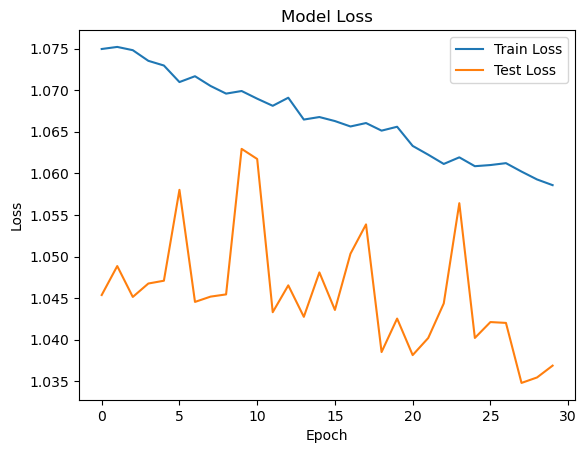

In [12]:
from sklearn.model_selection import train_test_split

# Prepare the data for training
# Merging the user and item features with the ratings dataframe
merged_user_df = ratings_df.merge(user_features_normalized_df, left_on='userId', right_index=True)
merged_item_df = merged_user_df.merge(item_features_normalized_df, left_on='articleID', right_index=True)

# Selecting the features and the target
X_user = merged_item_df[['average_reading_time', 'variance_reading_time', 'average_user_rating']].values
X_item = merged_item_df[['article_average_rating', 'article_year', 'Average Reading Time']].values
y = merged_item_df['rating'].values

# Split the data into training and test sets
X_user_train, X_user_test, X_item_train, X_item_test, y_train, y_test = train_test_split(X_user, X_item, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit([X_user_train, X_item_train], y_train, validation_data=([X_user_test, X_item_test], y_test), epochs=30, verbose=1)

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [1]:
# model.save('saved_model');

In [2]:
# model.save('saved_model.h5');

In [3]:
# import tensorflowjs as tfjs